In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('cardio_train.csv')

In [2]:
# Check the column names in your DataFrame
print(heart_data.columns)

# Or display the first few rows of your DataFrame
print(heart_data.head())


Index(['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'], dtype='object')
  id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0              0;18393;2;168;62.0;110;80;1;1;0;0;1;0                               
1              1;20228;1;156;85.0;140;90;3;1;0;0;1;1                               
2              2;18857;1;165;64.0;130;70;3;1;0;0;0;1                               
3             3;17623;2;169;82.0;150;100;1;1;0;0;1;1                               
4              4;17474;1;156;56.0;100;60;1;1;0;0;0;0                               


In [3]:
# Split the single column into multiple columns
heart_data = heart_data['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'].str.split(';', expand=True)

# Making the columns understandable
column_names = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
heart_data.columns = column_names

# Converting data types
heart_data = heart_data.astype({'id': int, 'age': int, 'gender': int, 'height': int, 'weight': float, 'ap_hi': int, 'ap_lo': int, 'cholesterol': int, 'gluc': int, 'smoke': int, 'alco': int, 'active': int, 'cardio': int})

# Display first 5 rows
heart_data.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# last 5 rows
heart_data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int32  
 1   age          70000 non-null  int32  
 2   gender       70000 non-null  int32  
 3   height       70000 non-null  int32  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int32  
 6   ap_lo        70000 non-null  int32  
 7   cholesterol  70000 non-null  int32  
 8   gluc         70000 non-null  int32  
 9   smoke        70000 non-null  int32  
 10  alco         70000 non-null  int32  
 11  active       70000 non-null  int32  
 12  cardio       70000 non-null  int32  
dtypes: float64(1), int32(12)
memory usage: 3.7 MB


In [6]:
# Check for missing values in each column
missing_values = heart_data.isnull().sum()

# Printing missing values if exist
print(missing_values)


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [7]:
heart_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


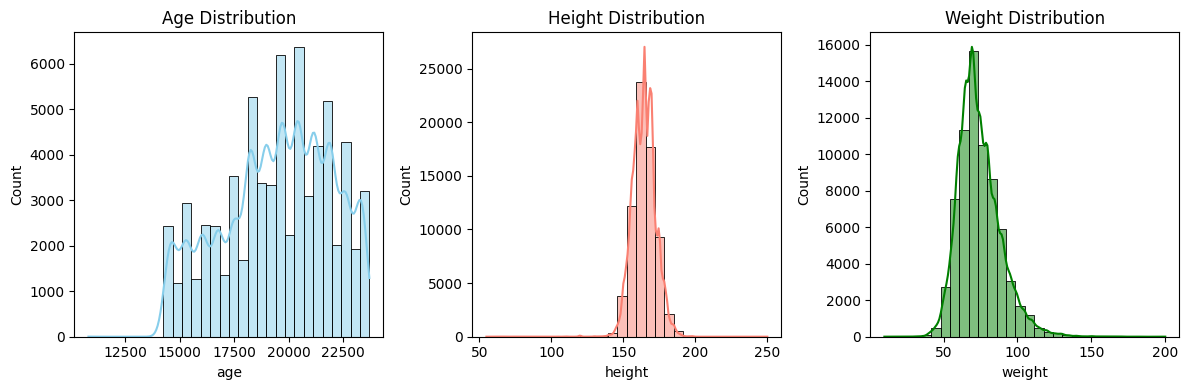

In [8]:
# Data visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(heart_data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(heart_data['height'], bins=30, kde=True, color='salmon')
plt.title('Height Distribution')

plt.subplot(1, 3, 3)
sns.histplot(heart_data['weight'], bins=30, kde=True, color='green')
plt.title('Weight Distribution')

plt.tight_layout()
plt.show()

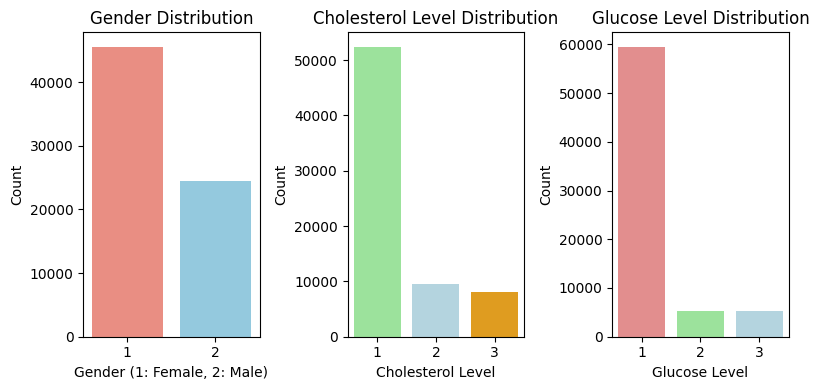

In [9]:
plt.figure(figsize=(10, 4))  # size

# Gender Distribution (Bar Plot)
plt.subplot(1, 4, 2)  # This is the second plot
sns.countplot(x='gender', data=heart_data, hue='gender', palette=['salmon', 'skyblue'], legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Count')

# Cholesterol Level Distribution (Bar Plot)
plt.subplot(1, 4, 3)  # This is the third plot
sns.countplot(x='cholesterol', data=heart_data, hue='cholesterol', palette=['lightgreen', 'lightblue', 'orange'], legend=False)
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')

# Glucose Level Distribution (Bar Plot)
plt.subplot(1, 4, 4)  # This is the fourth plot
sns.countplot(x='gluc', data=heart_data, hue='gluc', palette=['lightcoral', 'lightgreen', 'lightblue'], legend=False)
plt.title('Glucose Level Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [10]:
# Separate features (X) and target variable (y)
X = heart_data.drop(columns=['id', 'cardio'])
y = heart_data['cardio']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model with increased max_iter
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [11]:
# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7236428571428571
Precision: 0.7458157359612075
Recall: 0.6799771819737592
F1 Score: 0.7113763521074226
ROC AUC Score: 0.723717841129982


In [15]:
# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Convert predictions to human-readable labels
predictions = ["No Heart Disease" if pred == 0 else "Heart Disease" for pred in y_pred]

# Print the predictions for the first 30 individuals in the testing set
for i, prediction in enumerate(predictions[:30]):
    print(f"Person {i + 1}: {prediction}")


Person 1: Heart Disease
Person 2: Heart Disease
Person 3: Heart Disease
Person 4: No Heart Disease
Person 5: No Heart Disease
Person 6: No Heart Disease
Person 7: No Heart Disease
Person 8: No Heart Disease
Person 9: Heart Disease
Person 10: Heart Disease
Person 11: No Heart Disease
Person 12: No Heart Disease
Person 13: No Heart Disease
Person 14: No Heart Disease
Person 15: Heart Disease
Person 16: Heart Disease
Person 17: Heart Disease
Person 18: No Heart Disease
Person 19: No Heart Disease
Person 20: No Heart Disease
Person 21: No Heart Disease
Person 22: No Heart Disease
Person 23: No Heart Disease
Person 24: Heart Disease
Person 25: No Heart Disease
Person 26: Heart Disease
Person 27: Heart Disease
Person 28: No Heart Disease
Person 29: Heart Disease
Person 30: No Heart Disease


In [13]:
while True:
    try:
        # Input the person number
        person_number = int(input("Enter the person number: "))
        
        # Validation
        if person_number < 1 or person_number > len(X_test_scaled):
            print(f"Invalid person number. Please enter a number within the valid range (0 to {len(X_test_scaled)}).\n")
        else:
            # Get the features of the specific person
            X_single = X_test_scaled[person_number - 1].reshape(1, -1) 

            # Predict whether the specific person has heart disease or not
            prediction_single = model.predict(X_single)[0]

            # print the prediction
            if prediction_single == 0:
                print(f"Person {person_number} does not have Cardivascular disease 😏🥳.\n")
            else:
                print(f"Person {person_number} has Cardivascular disease 😣😭.\n")

        # y = yes / n = no
        check_others = input("Do you want to check for others? (Y/N): ").strip().upper()

        # Check if input is valid (either 'Y' or 'N')
        while check_others not in ['Y', 'N']:
            print("Please enter either 'Y' or 'N'.\n")
            check_others = input("Do you want to check for others? (Y/N): ").strip().upper()

        # Continue or break?
        if check_others != 'Y':
            break
    
    except ValueError:
        print("Please enter a validn number.\n")


Enter the person number:  100


Person 100 has Cardivascular disease 😣😭.



Do you want to check for others? (Y/N):  N


Please enter either 'Y' or 'N'.



Do you want to check for others? (Y/N):  n


In [14]:
print("Thank you for using the Cardivascular disease prediction tool!")

Thank you for using the Cardivascular disease prediction tool!
